# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [122]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st
import csv

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude

from citipy import citipy
# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)
print(cities)

['luena', 'victoria', 'syriam', 'luderitz', 'san quintin', 'ushuaia', 'the pas', 'lebu', 'port alfred', 'nikolskoye', 'warsaw', 'opuwo', 'yellowknife', 'jamestown', 'rikitea', 'yuza', 'barrow', 'havoysund', 'jalu', 'hermanus', 'don sak', 'havre', 'college', 'cidreira', 'the valley', 'syracuse', 'samusu', 'nichinan', 'los llanos de aridane', 'ahipara', 'belushya guba', 'berea', 'san patricio', 'sobolevo', 'kytlym', 'punta arenas', 'zhoucheng', 'manavgat', 'marawi', 'albany', 'merauke', 'jaen', 'upernavik', 'sandusky', 'new norfolk', 'amderma', 'mahebourg', 'esfarayen', 'mataura', 'kapaa', 'caxito', 'pitimbu', 'liuzhou', 'vaini', 'saskylakh', 'hambantota', 'redmond', 'codrington', 'rio grande', 'busselton', 'grand river south east', 'provideniya', 'diamantino', 'asfi', 'georgetown', 'cape town', 'vaitupu', 'prince albert', 'avarua', 'vao', 'bluff', 'bathsheba', 'taolanaro', 'tasiilaq', 'kodiak', 'port elizabeth', 'nador', 'chabahar', 'coari', 'hobart', 'sabha', 'tazovskiy', 'hokitika', '

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [30]:
url_weather = f"http://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}"
counter = 0
name = []
lat =[]
lon = []
maxtemp = []
humidity = []
cloudiness = []
windspeed = []
country = []
date = []



for city in cities:
    counter +=1
    url_weather = f"http://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}"
    response = requests.get(url_weather).json()
    try:
        name.append(response["name"])
        lat.append(response["coord"]["lat"])
        lon.append(response["coord"]["lon"])
        maxtemp.append(response["main"]["temp_max"])
        humidity.append(response["main"]["humidity"])
        cloudiness.append(response["clouds"]["all"])
        windspeed.append(response["wind"]["speed"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        print(f"Performing request for {city}, its number {counter}")
    except:
        print("Whoops, gotta skip that one")
    

Performing request for luena, its number 1
Performing request for victoria, its number 2
Performing request for syriam, its number 3
Performing request for luderitz, its number 4
Performing request for san quintin, its number 5
Performing request for ushuaia, its number 6
Performing request for the pas, its number 7
Performing request for lebu, its number 8
Performing request for port alfred, its number 9
Performing request for nikolskoye, its number 10
Performing request for warsaw, its number 11
Performing request for opuwo, its number 12
Performing request for yellowknife, its number 13
Performing request for jamestown, its number 14
Performing request for rikitea, its number 15
Performing request for yuza, its number 16
Performing request for barrow, its number 17
Performing request for havoysund, its number 18
Performing request for jalu, its number 19
Performing request for hermanus, its number 20
Performing request for don sak, its number 21
Performing request for havre, its num

Performing request for faanui, its number 181
Performing request for uberlandia, its number 182
Performing request for souillac, its number 183
Performing request for pisco, its number 184
Performing request for hofn, its number 185
Performing request for anito, its number 186
Performing request for deputatskiy, its number 187
Performing request for tual, its number 188
Performing request for vilyuysk, its number 189
Performing request for lakes entrance, its number 190
Performing request for port lincoln, its number 191
Performing request for port hedland, its number 192
Performing request for nsanje, its number 193
Performing request for rudbar, its number 194
Whoops, gotta skip that one
Performing request for carnarvon, its number 196
Performing request for airai, its number 197
Performing request for georgiyevka, its number 198
Performing request for vardo, its number 199
Performing request for timbiqui, its number 200
Whoops, gotta skip that one
Performing request for bodrum, its 

Performing request for rocha, its number 359
Performing request for lithgow, its number 360
Performing request for saint anthony, its number 361
Performing request for telsiai, its number 362
Performing request for henties bay, its number 363
Whoops, gotta skip that one
Performing request for tanga, its number 365
Whoops, gotta skip that one
Performing request for dauphin, its number 367
Performing request for erzin, its number 368
Performing request for norrtalje, its number 369
Performing request for blythe, its number 370
Performing request for sao jose da coroa grande, its number 371
Performing request for tchaourou, its number 372
Performing request for chekmagush, its number 373
Whoops, gotta skip that one
Performing request for lagoa, its number 375
Performing request for sinnamary, its number 376
Performing request for kaltasy, its number 377
Whoops, gotta skip that one
Whoops, gotta skip that one
Performing request for haines junction, its number 380
Performing request for ewa

Performing request for linxia, its number 535
Performing request for porto belo, its number 536
Performing request for jesup, its number 537
Performing request for lucea, its number 538
Performing request for dingle, its number 539
Performing request for fairbanks, its number 540
Performing request for tianpeng, its number 541
Performing request for taoudenni, its number 542
Performing request for imbituba, its number 543
Performing request for mazara del vallo, its number 544
Performing request for xingcheng, its number 545
Performing request for vuktyl, its number 546
Performing request for medea, its number 547
Performing request for harper, its number 548
Performing request for betsiamites, its number 549
Performing request for licheng, its number 550
Performing request for arsenyev, its number 551
Performing request for beboto, its number 552
Performing request for newton, its number 553
Performing request for oussouye, its number 554
Performing request for toora-khem, its number 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [31]:
print(name)
print(lat)
print(lon)
print(maxtemp)
print(humidity)
print(cloudiness)
print(windspeed)
print(country)
print(date)

['Luena', 'Hong Kong', 'Syriam', 'Lüderitz', 'San Quintín', 'Ushuaia', 'The Pas', 'Lebu', 'Port Alfred', 'Nikolskoye', 'Warsaw', 'Opuwo', 'Yellowknife', 'Jamestown', 'Rikitea', 'Yuza', 'Barrow', 'Havøysund', 'Jalu', 'Hermanus', 'Don Sak', 'Arrondissement du Havre', 'College', 'Cidreira', 'The Valley', 'Syracuse', 'Nichinan', 'Los Llanos de Aridane', 'Ahipara', 'Berea', 'San Patricio', 'Sobolevo', 'Punta Arenas', 'Zhoucheng', 'Manavgat', 'Marawi', 'Albany', 'Merauke', 'Jaen', 'Upernavik', 'Sandusky', 'New Norfolk', 'Mahébourg', 'Esfarāyen', 'Mataura', 'Kapaa', 'Caxito', 'Pitimbu', 'Liuzhou', 'Vaini', 'Saskylakh', 'Hambantota', 'Redmond', 'Codrington', 'Rio Grande', 'Busselton', 'Provideniya', 'Diamantino', 'Safi', 'George Town', 'Cape Town', 'Prince Albert', 'Avarua', 'Vao', 'Bluff', 'Bathsheba', 'Tasiilaq', 'Saint Paul Harbor', 'Port Elizabeth', 'Nador', 'Chabahar', 'Coari', 'Hobart', 'Sabha', 'Tazovsky', 'Hokitika', 'Ilulissat', 'Cradock', 'San Policarpo', 'Fernley', 'Xiangfan', 'Semī

In [34]:

with open('city_data.csv', 'w',newline="",encoding="utf-8") as f:
    write = csv.writer(f)
    headers = ["City","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed","Country","Date"]
    write.writerow(headers)      
    for j in range(len(date)):
    
        rows = [name[j],lat[j],lon[j],maxtemp[j],humidity[j],cloudiness[j],windspeed[j],country[j],date[j]]    
        write.writerow(rows)
    

In [60]:
citydatadf = pd.read_csv("city_data.csv")
citydatadf

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Luena,-11.7833,19.9167,299.49,18,7,2.52,AO,1657451091
1,Hong Kong,22.2855,114.1577,305.35,75,32,4.47,HK,1657451091
2,Syriam,16.7722,96.2378,300.21,94,100,3.09,MM,1657450922
3,Lüderitz,-26.6481,15.1594,288.62,71,23,3.00,NaN,1657451091
4,San Quintín,30.4833,-115.9500,291.87,90,15,4.47,MX,1657451091
...,...,...,...,...,...,...,...,...,...
576,Acaraú,-2.8856,-40.1200,298.84,72,85,6.09,BR,1657451151
577,Ust'-Donetskiy,47.6419,40.8718,309.60,15,100,8.81,RU,1657451151
578,Joshīmath,30.5667,79.5667,296.16,89,100,0.90,IN,1657451151
579,Magadan,59.5667,150.8000,288.09,78,2,2.54,RU,1657451151


In [61]:
citydatadf.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,581.000000,581.000000,581.000000,581.000000,581.000000,581.000000,5.810000e+02
mean,19.646154,13.978284,294.711377,67.736661,54.629948,3.693546,1.657451e+09
std,33.111926,88.936316,8.265195,23.565489,38.981062,2.453045,8.298066e+01
min,-54.800000,-175.200000,270.210000,5.000000,0.000000,0.000000,1.657450e+09
25%,-8.650000,-63.040800,288.640000,53.000000,13.000000,1.890000,1.657451e+09
50%,22.890900,18.423200,296.160000,76.000000,61.000000,3.110000,1.657451e+09
75%,47.641900,96.110000,300.440000,86.000000,97.000000,5.080000,1.657451e+09
max,78.218600,179.316700,317.190000,100.000000,100.000000,13.130000,1.657451e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [44]:
#check if there are any cities with humidity >100%, there are none so we skip this step
findhumid  = citydatadf.loc[citydatadf["Humidity"]>100,"Humidity"]
findhumid

Series([], Name: Humidity, dtype: int64)

In [17]:
#  Get the indices of cities that have humidity over 100%.


Int64Index([], dtype='int64')

In [19]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,butaritari,3.07,172.79,83.32,74,84,10.42,KI,1593605283
1,yerbogachen,61.28,108.01,79.52,58,20,7.70,RU,1593605121
2,cape town,-33.93,18.42,73.00,77,27,4.70,ZA,1593605039
3,touba,8.28,-7.68,79.97,75,82,3.58,CI,1593605284
4,jamestown,42.10,-79.24,64.00,88,1,6.93,US,1593605284


In [62]:
#Converting Kelvins to Celcius
citydatadf["Max Temp"] = citydatadf["Max Temp"]-273.15
citydatadf

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Luena,-11.7833,19.9167,26.34,18,7,2.52,AO,1657451091
1,Hong Kong,22.2855,114.1577,32.20,75,32,4.47,HK,1657451091
2,Syriam,16.7722,96.2378,27.06,94,100,3.09,MM,1657450922
3,Lüderitz,-26.6481,15.1594,15.47,71,23,3.00,NaN,1657451091
4,San Quintín,30.4833,-115.9500,18.72,90,15,4.47,MX,1657451091
...,...,...,...,...,...,...,...,...,...
576,Acaraú,-2.8856,-40.1200,25.69,72,85,6.09,BR,1657451151
577,Ust'-Donetskiy,47.6419,40.8718,36.45,15,100,8.81,RU,1657451151
578,Joshīmath,30.5667,79.5667,23.01,89,100,0.90,IN,1657451151
579,Magadan,59.5667,150.8000,14.94,78,2,2.54,RU,1657451151


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

In [72]:
#finding todays date
today = pd.Timestamp("today").strftime("%m/%d/%Y")


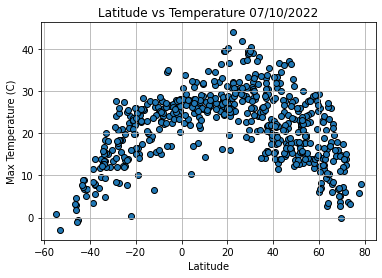

In [144]:

citylat = citydatadf['Lat']
citymaxtemp = citydatadf['Max Temp']
plt.scatter(citylat,citymaxtemp,edgecolors="black")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title(f"Latitude vs Temperature {today}")
plt.grid()
plt.savefig("Lat vs Temp.jpg")
plt.show()


## Latitude vs. Humidity Plot

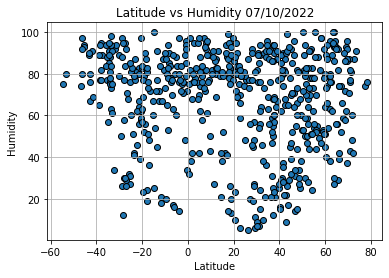

In [143]:
citylat = citydatadf['Lat']
cityhumid = citydatadf['Humidity']
plt.scatter(citylat,cityhumid,edgecolors="black")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title(f"Latitude vs Humidity {today}")
plt.grid()
plt.savefig("Lat vs Humidity.jpg")
plt.show()


## Latitude vs. Cloudiness Plot

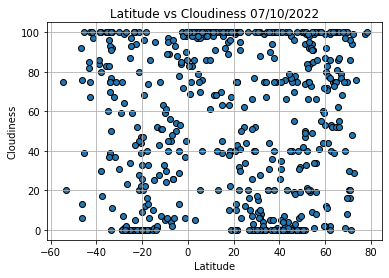

In [142]:
citylat = citydatadf['Lat']
citycloud = citydatadf['Cloudiness']
plt.scatter(citylat,citycloud,edgecolors="black")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title(f"Latitude vs Cloudiness {today}")
plt.grid()
plt.savefig("Lat vs Cloudiness.jpg")
plt.show()


## Latitude vs. Wind Speed Plot

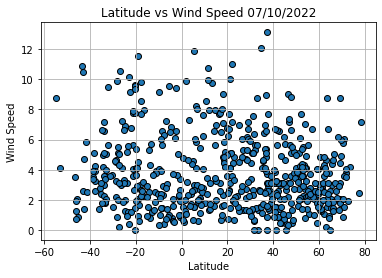

In [145]:
citylat = citydatadf['Lat']
citywind = citydatadf['Wind Speed']
plt.scatter(citylat,citywind,edgecolors="black")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title(f"Latitude vs Wind Speed {today}")
plt.grid()
plt.savefig("Lat vs WindSpeed.jpg")
plt.show()


## Linear Regression

In [95]:
citylatnorth = citydatadf.loc[citydatadf['Lat']>0,'Lat']
citylatnorth

1      22.2855
2      16.7722
4      30.4833
6      53.8251
9      59.7035
        ...   
574    65.9811
575    12.5847
577    47.6419
578    30.5667
579    59.5667
Name: Lat, Length: 400, dtype: float64

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

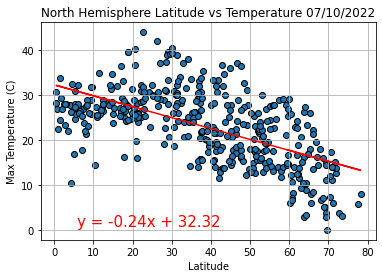

The correlation coefficient between North Hemisphere Lat and temperature is -0.6


In [130]:
x_values = citydatadf.loc[citydatadf['Lat']>0,'Lat']
y_values = citydatadf.loc[citydatadf['Lat']>0,'Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")


citylatnorth = citydatadf.loc[citydatadf['Lat']>0,'Lat']
citymaxtemp = citydatadf.loc[citydatadf['Lat']>0,'Max Temp']

plt.scatter(citylatnorth,citymaxtemp,edgecolors="black")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title(f"North Hemisphere Latitude vs Temperature {today}")
plt.grid()
plt.show()
print(f"The correlation coefficient between North Hemisphere Lat and temperature is {round(st.pearsonr(citymaxtemp,citylatnorth)[0],2)}")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

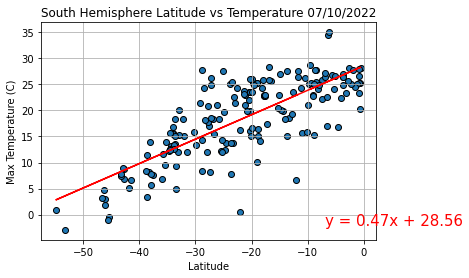

The correlation coefficient between South Hemisphere Lat and temperature is 0.78


In [129]:
x_values = citydatadf.loc[citydatadf['Lat']<0,'Lat']
y_values = citydatadf.loc[citydatadf['Lat']<0,'Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-7,-2),fontsize=15,color="red")


citylatsouth = citydatadf.loc[citydatadf['Lat']<0,'Lat']
citymaxtemp = citydatadf.loc[citydatadf['Lat']<0,'Max Temp']

plt.scatter(citylatsouth,citymaxtemp,edgecolors="black")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title(f"South Hemisphere Latitude vs Temperature {today}")
plt.grid()
plt.show()
print(f"The correlation coefficient between South Hemisphere Lat and temperature is {round(st.pearsonr(citymaxtemp,citylatsouth)[0],2)}")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

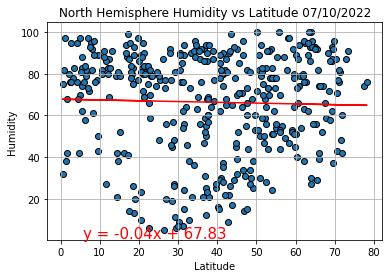

The correlation coefficient between North Hemisphere Humidity and Lat is -0.03


In [127]:
x_values = citydatadf.loc[citydatadf['Lat']>0,'Lat']
y_values = citydatadf.loc[citydatadf['Lat']>0,'Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")


citylatnorth = citydatadf.loc[citydatadf['Lat']>0,'Lat']
cityhumid = citydatadf.loc[citydatadf['Lat']>0,'Humidity']

plt.scatter(citylatnorth,cityhumid,edgecolors="black")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title(f"North Hemisphere Humidity vs Latitude {today}")
plt.grid()
plt.show()
print(f"The correlation coefficient between North Hemisphere Humidity and Lat is {round(st.pearsonr(cityhumid,citylatnorth)[0],2)}")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

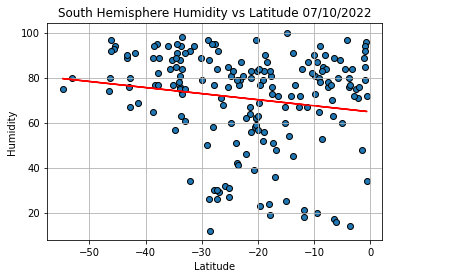

The correlation coefficient between South Hemisphere Humidity and Lat is -0.16


In [126]:
x_values = citydatadf.loc[citydatadf['Lat']<0,'Lat']
y_values = citydatadf.loc[citydatadf['Lat']<0,'Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-10,-5),fontsize=15,color="red")


citylatsouth = citydatadf.loc[citydatadf['Lat']<0,'Lat']
cityhumid = citydatadf.loc[citydatadf['Lat']<0,'Humidity']

plt.scatter(citylatsouth,cityhumid,edgecolors="black")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title(f"South Hemisphere Humidity vs Latitude {today}")
plt.grid()
plt.show()
print(f"The correlation coefficient between South Hemisphere Humidity and Lat is {round(st.pearsonr(cityhumid,citylatsouth)[0],2)}")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

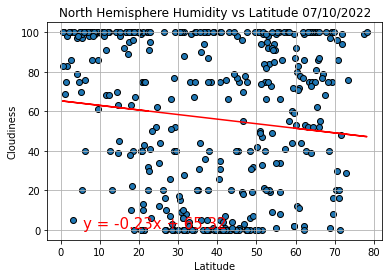

The correlation coefficient between North Hemisphere Cloudiness and Lat is -0.12


In [131]:
x_values = citydatadf.loc[citydatadf['Lat']>0,'Lat']
y_values = citydatadf.loc[citydatadf['Lat']>0,'Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")


citylatnorth = citydatadf.loc[citydatadf['Lat']>0,'Lat']
citycloud = citydatadf.loc[citydatadf['Lat']>0,'Cloudiness']

plt.scatter(citylatnorth,citycloud,edgecolors="black")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title(f"North Hemisphere Cloudiness vs Latitude {today}")
plt.grid()
plt.show()
print(f"The correlation coefficient between North Hemisphere Cloudiness and Lat is {round(st.pearsonr(citycloud,citylatnorth)[0],2)}")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

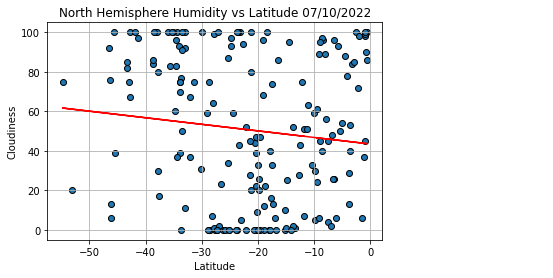

The correlation coefficient between South Hemisphere Cloudiness and Lat is -0.11


In [132]:
x_values = citydatadf.loc[citydatadf['Lat']<0,'Lat']
y_values = citydatadf.loc[citydatadf['Lat']<0,'Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")


citylatsouth = citydatadf.loc[citydatadf['Lat']<0,'Lat']
citycloud = citydatadf.loc[citydatadf['Lat']<0,'Cloudiness']

plt.scatter(citylatsouth,citycloud,edgecolors="black")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title(f"South Hemisphere Cloudiness vs Latitude {today}")
plt.grid()
plt.show()
print(f"The correlation coefficient between South Hemisphere Cloudiness and Lat is {round(st.pearsonr(citycloud,citylatsouth)[0],2)}")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

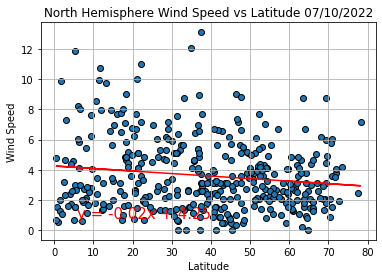

The correlation coefficient between North Hemisphere Wind Speed and Lat is -0.14


In [133]:
x_values = citydatadf.loc[citydatadf['Lat']>0,'Lat']
y_values = citydatadf.loc[citydatadf['Lat']>0,'Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")


citylatnorth = citydatadf.loc[citydatadf['Lat']>0,'Lat']
citywind = citydatadf.loc[citydatadf['Lat']>0,'Wind Speed']

plt.scatter(citylatnorth,citywind,edgecolors="black")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title(f"North Hemisphere Wind Speed vs Latitude {today}")
plt.grid()
plt.show()
print(f"The correlation coefficient between North Hemisphere Wind Speed and Lat is {round(st.pearsonr(citywind,citylatnorth)[0],2)}")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

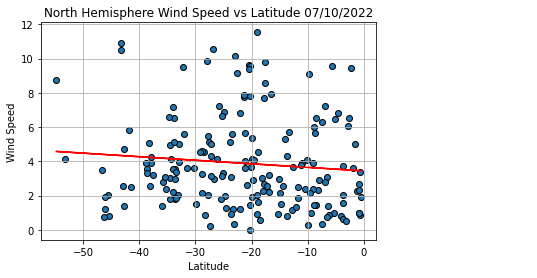

The correlation coefficient between South Hemisphere Wind Speed and Lat is -0.1


In [134]:
x_values = citydatadf.loc[citydatadf['Lat']<0,'Lat']
y_values = citydatadf.loc[citydatadf['Lat']<0,'Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")


citylatsouth = citydatadf.loc[citydatadf['Lat']<0,'Lat']
citywind = citydatadf.loc[citydatadf['Lat']<0,'Wind Speed']

plt.scatter(citylatsouth,citywind,edgecolors="black")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title(f"North Hemisphere Wind Speed vs Latitude {today}")
plt.grid()
plt.show()
print(f"The correlation coefficient between South Hemisphere Wind Speed and Lat is {round(st.pearsonr(citywind,citylatsouth)[0],2)}")

In [ ]:
#Observing the charts it is evident that there is a strong correlation between Lattitude and temperature, 
#but there is almost no correlation with any other parameters.
#Humidity is only exception as there is a slight correlation with latitude on both ends 
#It is worth noting that the majority of the cities are coastal since programm picks random coordinates and a lot of them
#will fall into ocean, so picking the closest point would be a coastal city which most likely will have higher humidity. 
#this might affect the data.